In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [85]:
df = pd.read_csv("./JEOPARDY_CSV.csv", parse_dates=["Air Date"])
df.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


In [157]:
df.shape

(216930, 7)

In [160]:
df.describe(include='all', datetime_is_numeric=True)

,Show Number,Air Date,Round,Category,Value,Question,Answer
count,216930.000000,216930,216930,216930,216930,216930,216928
unique,NaN,NaN,4,27995,150,216124,88268
top,NaN,NaN,Jeopardy!,BEFORE & AFTER,$400,[audio clue],China
freq,NaN,NaN,107384,547,42244,17,216
mean,4264.238519,2003-03-08 00:06:26.734891648,NaN,NaN,NaN,NaN,NaN
min,1.000000,1984-09-10 00:00:00,NaN,NaN,NaN,NaN,NaN
25%,3349.000000,1999-03-11 00:00:00,NaN,NaN,NaN,NaN,NaN
50%,4490.000000,2004-02-27 00:00:00,NaN,NaN,NaN,NaN,NaN
75%,5393.000000,2008-02-06 00:00:00,NaN,NaN,NaN,NaN,NaN
max,6300.000000,2012-01-27 00:00:00,NaN,NaN,NaN,NaN,NaN


In [161]:
df.isnull().sum()

Show Number    0
Air Date       0
Round          0
Category       0
Value          0
Question       0
Answer         2
dtype: int64

In [3]:
shows = df['Show Number']
s = shows.unique()
print("Number of episodes:", len(s))

Number of episodes: 3640


In [4]:
categories = df['Category']
c = categories.unique()
print(len(c))

27995


In [5]:
cdict = {}
for j in c:
    cdict[j] = 0
# print(count)
for i in df['Category']:
    for j in c:
        if i == j:
            cdict[j] += 1
count = pd.DataFrame(cdict.items(), columns=['Category', 'Count'])
print(count)

                              Category  Count
0                              HISTORY    349
1      ESPN's TOP 10 ALL-TIME ATHLETES      5
2          EVERYBODY TALKS ABOUT IT...      4
3                     THE COMPANY LINE      5
4                  EPITAPHS & TRIBUTES      5
...                                ...    ...
27990             LOVE SONGS IN GERMAN      5
27991              FIRST IN OUR HEARTS      5
27992                     OFF-BROADWAY      5
27993                   RIDDLE ME THIS      5
27994           AUTHORS IN THEIR YOUTH      5

[27995 rows x 2 columns]


In [6]:
a = count.sort_values(by=['Count'], ascending=False)
a.head(60)

,Category,Count
722,BEFORE & AFTER,547
60,SCIENCE,519
522,LITERATURE,496
152,AMERICAN HISTORY,418
188,POTPOURRI,401
850,WORLD HISTORY,377
76,WORD ORIGINS,371
297,COLLEGES & UNIVERSITIES,351
0,HISTORY,349
490,SPORTS,342


In [7]:
for i in a['Category']:
    if (i == "HISTORY"):
        print(type(i))

<class 'str'>


## Combining similar topics

In [8]:
a.set_index('Category', inplace=True)

In [9]:
new_cat = {}

In [10]:
music = 0
for cat, cou in zip(a.index, a['Count']):
    if "MUSIC" in cat or "SONG" in cat:
        # print(cat,cou)
        music += cou
        a.drop(cat, axis=0, inplace=True)
new_cat["MUSIC"] = music
print(new_cat)

{'MUSIC': 4878}


In [11]:
geo = 0
for cat, cou in zip(a.index, a['Count']):
    if "GEOGRAPHY" in cat:
        # print(cat,cou)
        geo += cou
        a.drop(cat, axis=0, inplace=True)
new_cat["GEOGRAPHY"] = geo
print(new_cat)

{'MUSIC': 4878, 'GEOGRAPHY': 1429}


In [12]:
hist = 0
for cat, cou in zip(a.index, a['Count']):
    if "HISTORY" in cat or "CENTURY" in cat:
        # print(cat,cou)
        hist += cou
        a.drop(cat, axis=0, inplace=True)
print(hist)
new_cat["HISTORY"] = hist
print(new_cat)

6026
{'MUSIC': 4878, 'GEOGRAPHY': 1429, 'HISTORY': 6026}


In [13]:
sci = 0
for cat, cou in zip(a.index, a['Count']):
    if "SCIENCE" in cat or "BIOLOGY" in cat or "PHYSIC" in cat or "CHEMISTRY" in cat or "INVENTION" in cat or "INVENTION" in cat :
        # print(cat,cou)
        sci += cou
        a.drop(cat, axis=0, inplace=True)
print(sci)
new_cat["SCIENCE"] = sci
print(new_cat)

3122
{'MUSIC': 4878, 'GEOGRAPHY': 1429, 'HISTORY': 6026, 'SCIENCE': 3122}


In [14]:
gov = 0
for cat, cou in zip(a.index, a['Count']):
    if "GOVERN" in cat or "POLITIC" in cat or "STATE" in cat:
        # print(cat,cou)
        gov += cou
        a.drop(cat, axis=0, inplace=True)
print(gov)
new_cat["GOVERNMENT"] = gov
print(new_cat)

3855
{'MUSIC': 4878, 'GEOGRAPHY': 1429, 'HISTORY': 6026, 'SCIENCE': 3122, 'GOVERNMENT': 3855}


In [15]:
lit = 0
for cat, cou in zip(a.index, a['Count']):
    if "LITERATURE" in cat or "POET" in cat or "POEM" in cat:
        # print(cat,cou)
        lit += cou
        a.drop(cat, axis=0, inplace=True)
print(lit)
new_cat["LITERATURE"] = lit
print(new_cat)

2542
{'MUSIC': 4878, 'GEOGRAPHY': 1429, 'HISTORY': 6026, 'SCIENCE': 3122, 'GOVERNMENT': 3855, 'LITERATURE': 2542}


In [16]:
ndf = pd.DataFrame(new_cat.items(), columns=['Category', 'Count']).set_index('Category')
print(ndf)
print(a)

            Count
Category         
MUSIC        4878
GEOGRAPHY    1429
HISTORY      6026
SCIENCE      3122
GOVERNMENT   3855
LITERATURE   2542
                         Count
Category                      
BEFORE & AFTER             547
POTPOURRI                  401
WORD ORIGINS               371
COLLEGES & UNIVERSITIES    351
SPORTS                     342
...                        ...
CITIES IN ENGLAND            1
OPEC                         1
1999 TELEVISION              1
'90s NOTABLES                1
CELEBRITY NAMES              1

[25975 rows x 1 columns]


In [17]:
df3 = pd.concat([a, ndf])
df3 = df3.sort_values(by=['Count'], ascending=False)
print(df3.head(15))

                         Count
Category                      
HISTORY                   6026
MUSIC                     4878
GOVERNMENT                3855
SCIENCE                   3122
LITERATURE                2542
GEOGRAPHY                 1429
BEFORE & AFTER             547
POTPOURRI                  401
WORD ORIGINS               371
COLLEGES & UNIVERSITIES    351
SPORTS                     342
U.S. CITIES                339
BODIES OF WATER            327
ANIMALS                    324
BUSINESS & INDUSTRY        311


In [18]:
df2 = df3.head(10)
df2

,Count
Category,
HISTORY,6026
MUSIC,4878
GOVERNMENT,3855
SCIENCE,3122
LITERATURE,2542
GEOGRAPHY,1429
BEFORE & AFTER,547
POTPOURRI,401
WORD ORIGINS,371


In [19]:
# Code from SOF directly
font = {'family' : 'Noto Sans',
        'weight' : 'regular',
        'size'   : 32}

mpl.rc('font', **font)

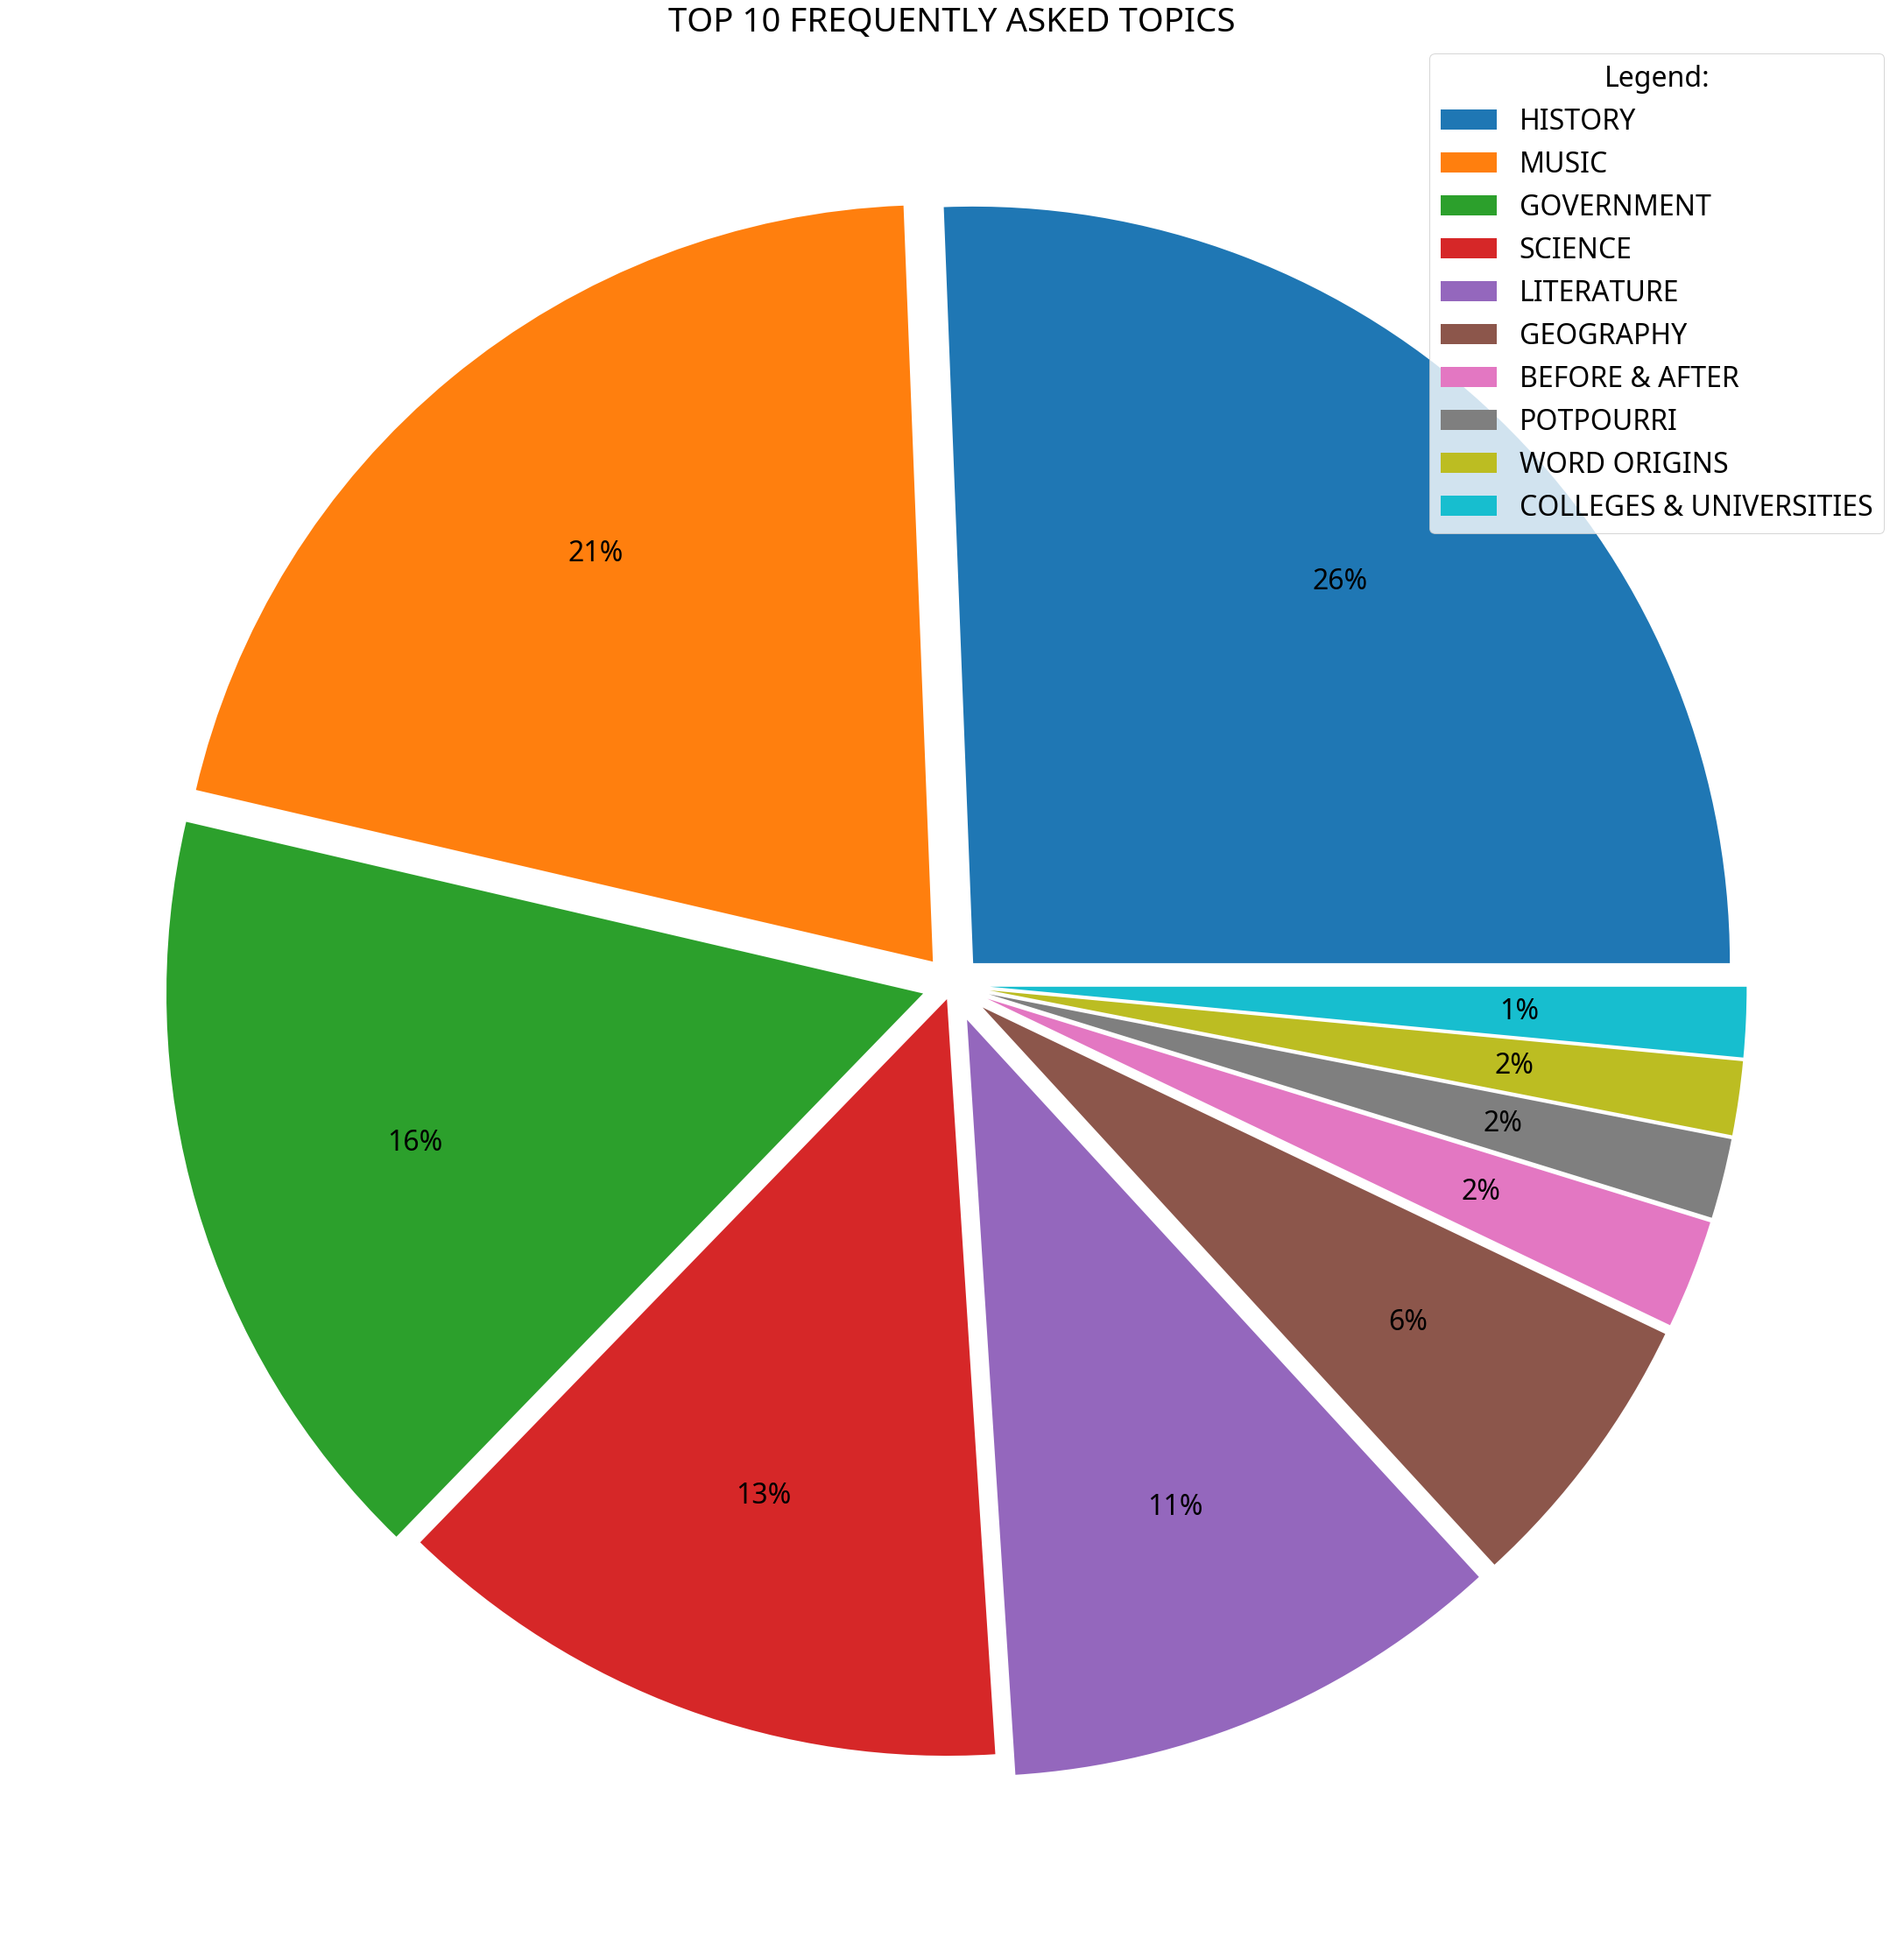

In [20]:
fig = plt.figure(figsize=(30,30))
fig.set_facecolor('white')
ax = fig.add_axes([0,0,1,1])
# ax.axis('equal')
explode = [0.04,0.04,0.04,0.02,0.05,0.05,0.05,0.05,0.05,0.05]
ax.pie(df2["Count"], startangle=0, explode=explode, shadow=False, autopct="%1.0f%%", pctdistance=0.7)
plt.title("TOP 10 FREQUENTLY ASKED TOPICS")
plt.legend(df2.index, title="Legend:")
plt.show()

You can control the distance of the percents and labels from the center of the pie using pctdistance= and labeldistance=, try this on your code:

plt.pie(sizes, labels=labels, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)

Jeopardy!           107384
Double Jeopardy!    105912
Final Jeopardy!       3631
Tiebreaker               3
Name: Round, dtype: int64
216930
<class 'pandas.core.series.Series'>
[107384, 105912, 3631, 3]


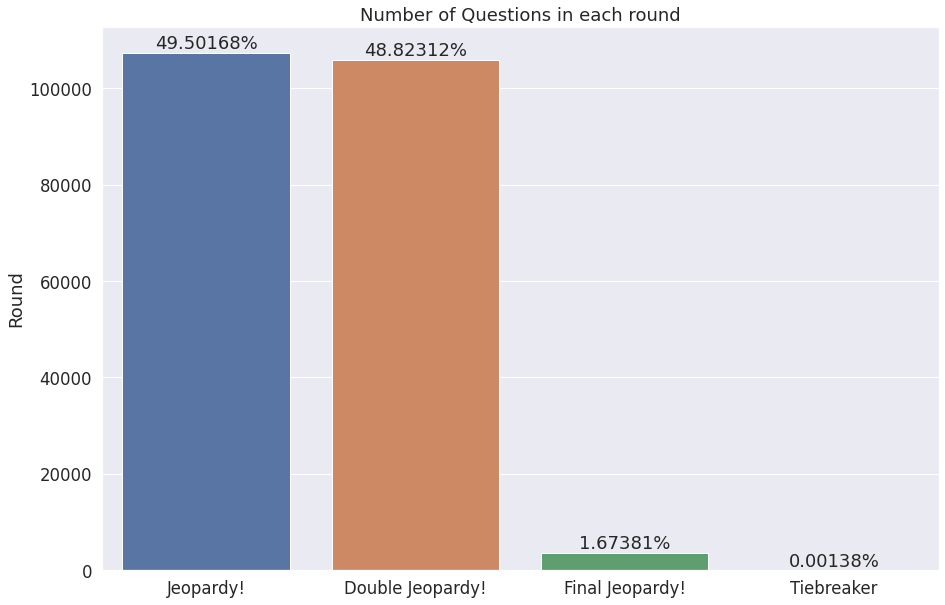

In [21]:
e = df['Round'].value_counts()
print(e)

fig = plt.figure(figsize=(15,10))
fig.set_facecolor('white')
colors = ['red', 'blue', 'green', 'orange']
s = 0
for i in range(len(e)):
    s += e[i]
print(s)

sns.set(font_scale=1.5)

plt.title("Number of Questions in each round")

splot = sns.barplot(x=e.index, y=e)
for p in splot.patches:
    splot.annotate('{:.5f}%'.format(p.get_height()*100/s), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
# plt.bar(e.index, e, width=0.4, color=colors)
print(type(e))
l = [e[i] for i in range(len(e))]
print(l)
# plt.legend()


# plt.legend(e.index, title="Different types of questions")
# ax = fig.add_axes([0,0,1,1])
# ax.pie(e, startangle=0, shadow=False, autopct="%10.0f%%")

# my_circle=plt.Circle( (0,0), 0.7, color='white')
# p=plt.gcf()
# p.gca().add_artist(my_circle)

# # plt.title("TOP 10 FREQUENTLY ASKED TOPICS")
# plt.legend(e.index, title="Legend:")
plt.show()

In [22]:
print(type(df["Air Date"]))
d = df["Air Date"].sort_values()
ds = d.unique()
print(len(ds))

<class 'pandas.core.series.Series'>
3640


In [29]:
print((df["Air Date"][0].date()))
dates = df["Air Date"].map(lambda t: t.date()).unique()
print(dates)

2004-12-31
[datetime.date(2004, 12, 31) datetime.date(2010, 7, 6)
 datetime.date(2000, 12, 18) ... datetime.date(2006, 9, 29)
 datetime.date(2007, 3, 23) datetime.date(2006, 5, 11)]


In [38]:
ndf = df.groupby(['Air Date']).size()
ndf = pd.DataFrame(ndf).reset_index()
ndf.rename({'Air Date':'Date', 0:'Count'}, inplace=True, axis=1)
ndf.head()

,Date,Count
0,1984-09-10,48
1,1984-09-11,50
2,1984-09-12,51
3,1984-09-13,53
4,1984-09-14,54


<AxesSubplot:xlabel='Show Aired Dates', ylabel='Frequency of Questions'>

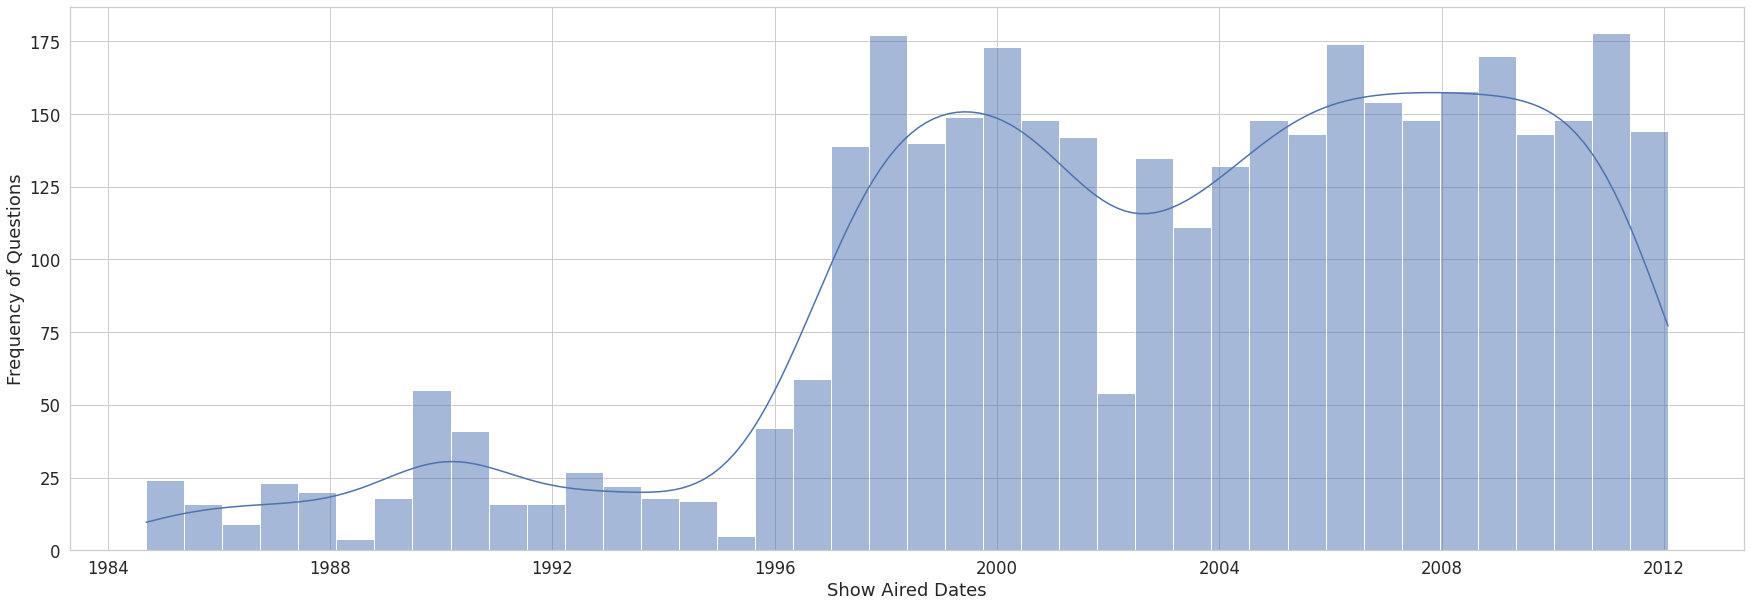

In [79]:
plt.figure(figsize=(30,10))
sns.set_style('whitegrid')
plt.xlabel("Show Aired Dates")
plt.ylabel("Frequency of Questions")
sns.histplot(ndf["Date"], bins=40, kde=True, element="bars")

In [101]:
ndf2 = df.groupby(["Value"]).size()
# print(ndf2)
ndf2 = pd.DataFrame(ndf2).reset_index()
ndf2.rename({0:"Count"}, axis=1, inplace=True)
ndf2['Value'] = ndf2['Value'].str.replace(",", "")
ndf2['Value'] = ndf2['Value'].str.replace("$", "")
ndf2['Value'] = [0 if i == "None" else i for i in ndf2['Value']]
ndf2['Value'] = ndf2["Value"].astype(float)
ndf2.sort_values(by="Value", inplace=True)
ndf2.head(100)

<ipython-input-101-8f549c08a75e>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  ndf2['Value'] = ndf2['Value'].str.replace("$", "")


,Value,Count
149,0.0,3634
100,5.0,9
62,20.0,1
65,22.0,1
112,50.0,1
...,...,...
97,4700.0,3
98,4800.0,24
101,5000.0,231
102,5001.0,1


In [155]:
a = ndf2.sort_values(by="Count", ascending=False).iloc[0]
print("Highest Number of Questions are asked for $" + str(a[0]) , "-" , a[1])

Highest Number of Questions are asked for $400.0 - 42244.0


<AxesSubplot:xlabel='Value of Each Question', ylabel='Frequency of Questions'>

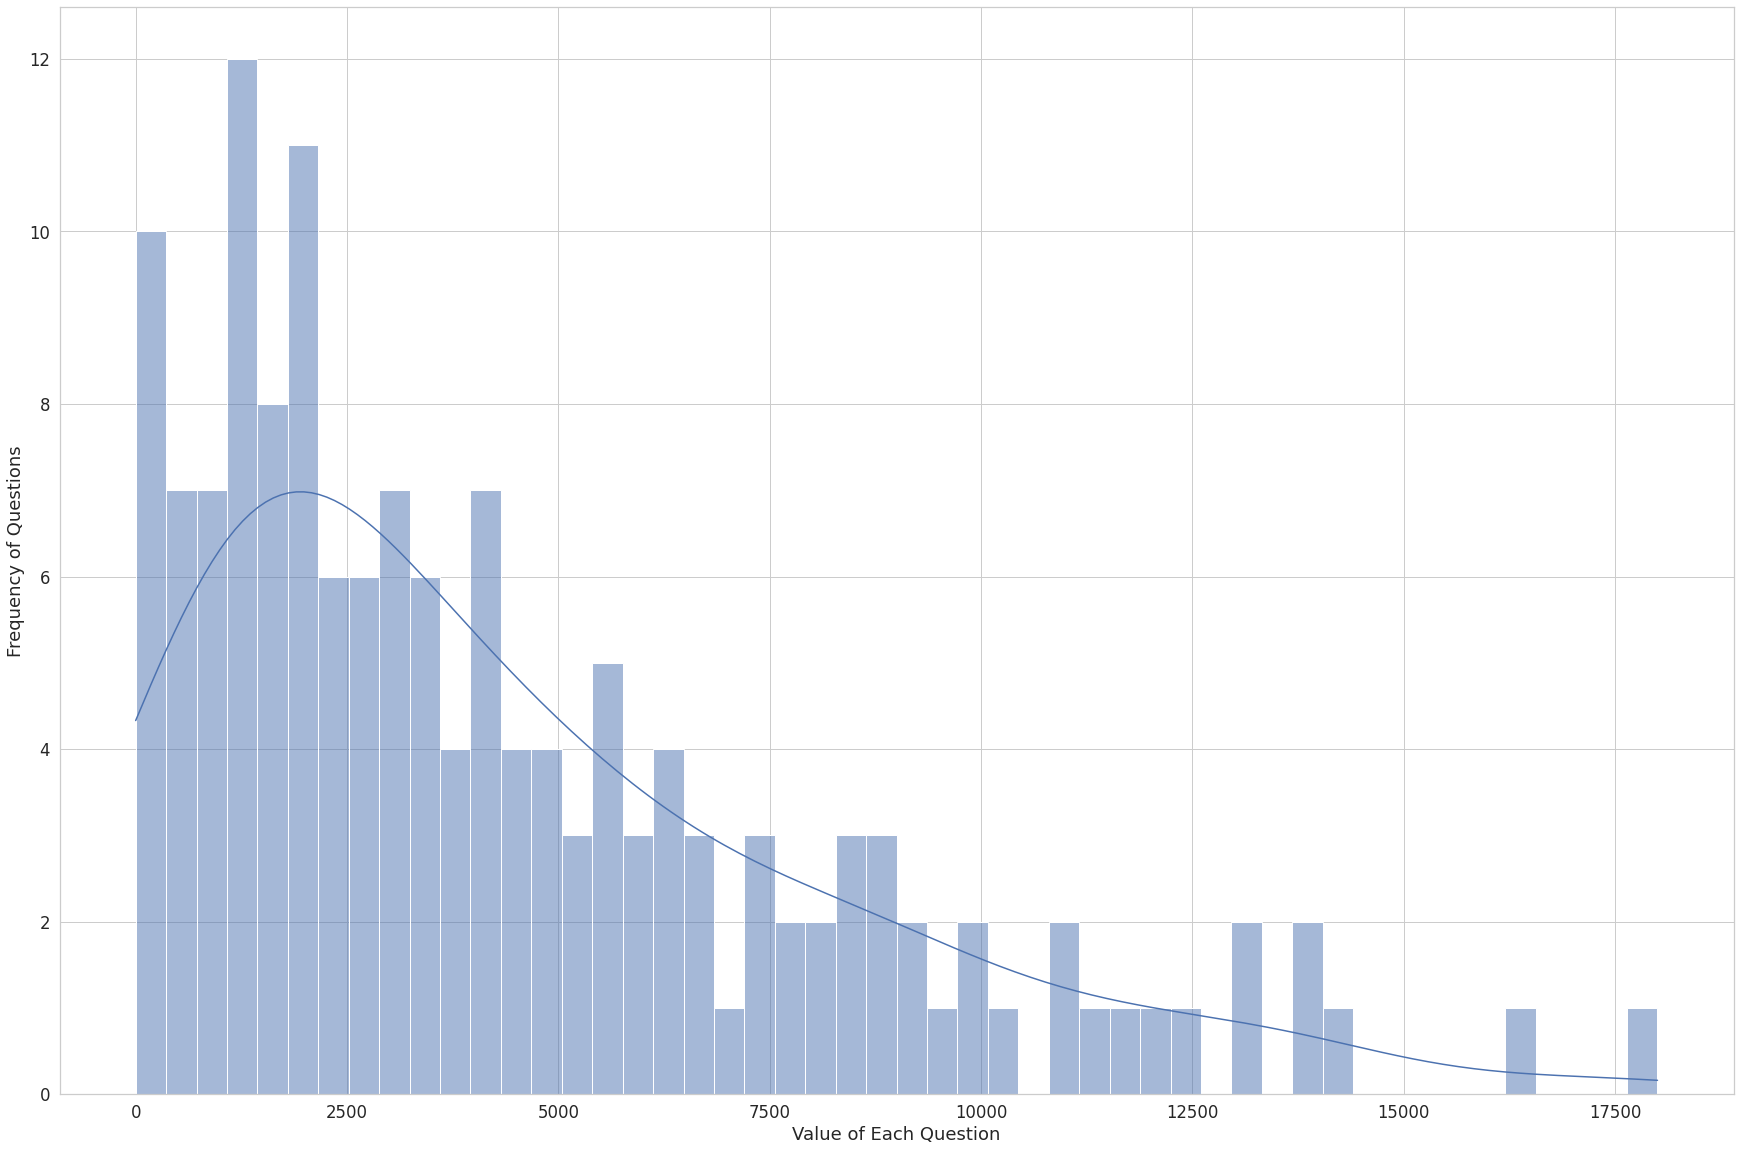

In [130]:
plt.figure(figsize=(30,20))
sns.set_style('whitegrid')
plt.xlabel("Value of Each Question")
plt.ylabel("Frequency of Questions")
sns.histplot(x=ndf2["Value"], bins=50, kde=True, element="bars")
# sns.barplot(x=ndf2["Value"], y=ndf2["Count"])